## Regression Models.



We have a set of measures
  $𝑋=[𝑥_1,𝑥_2,...,𝑥_𝑛]$
and the output $\hat y$, we would like to construct a linear model:
e un output 𝑦̂  costruisci un modello lineare:
$\hat y = 𝑏_0+ \sum_{𝑗=1}^𝑛 𝑥_𝑗 𝑏_𝑗$
che usa le misure $𝑋$ per predirre $𝑦$

To find $b$ we solve a least squares problem. In matrix form we have
$ 𝑋^𝑇 𝑏= \hat y$.



Let us presume that yesterday we observed
n = 30 pairs of data ($x_i, y_i$) for i=1,n. The data were generated artificially by an equation such as
$ y = f(x) + \epsilon$ where $\epsilon$ is an error component with distribution $N(0, \sigma^2), \sigma=1e-2$. We use now an example in the book "Azzalini A, Scarpa B., Data Analysis and Data Mining, Oxford University Press, 2012.

MEYER

In [ ]:
import numpy as np
#Meyer 4.6.8
A=np.array([[1,13.1,619,23],[1,13.5,803,42],[1,13.8,207,31],[1,13.1,409,31],[1,12.5,482,45]])
T=np.array([181,193,212,221,248])
alpha=np.linalg.solve(A.T@A,A.T@T)
print(alpha)

#Meyer 4.6.6
A=np.array([[1,1],[1,2],[1,3],[1,4],[1,5]])
b=np.array([16,28,45,74,122])
b=np.log(b)
alpha=np.linalg.solve(A.T@A,A.T@b)
print(alpha)



OTHER EXAMPLES

   x      y.yesterday    y.tomorrow
0     0.5000000 0.4269584 0.4468527
1     0.5862069 0.4841696 0.4769383
2     0.6724138 0.4957393 0.5109149
3     0.7586207 0.5438164 0.5130406
4     0.8448276 0.5379404 0.5231111
5     0.9310345 0.5375140 0.5526467
6     1.0172414 0.5401231 0.5371602
7     1.1034483 0.5447002 0.5485324
8     1.1896552 0.5453667 0.5446904
9     1.2758621 0.5337212 0.5325971
10    1.3620690 0.5360551 0.5432252
11    1.4482759 0.5482129 0.5316430
12    1.5344828 0.5277309 0.5189950
13    1.6206897 0.5032543 0.5243238
14    1.7068966 0.5094058 0.5277170
15    1.7931034 0.5049205 0.5028689
16    1.8793103 0.5224972 0.5274091
17    1.9655172 0.5278002 0.5019069
18    2.0517241 0.5249105 0.5037381
19    2.1379310 0.5106958 0.5030663
20    2.2241379 0.5027985 0.4993774
21    2.3103448 0.4895309 0.5153410
22    2.3965517 0.5117247 0.5086377
23    2.4827586 0.5131897 0.5068553
24    2.5689655 0.4986823 0.4912001
25    2.6551724 0.5110766 0.5021926
26    2.7413793 0.5056585 0.

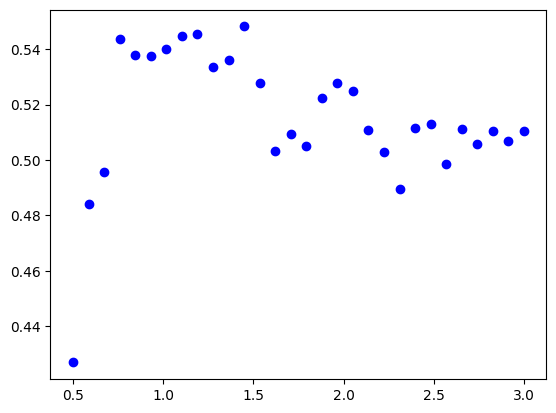

In [3]:
import matplotlib.pyplot as plt
import numpy as np

import pandas
datayP = pandas.read_csv('yesterday.csv')
print(datayP)

datay = np.genfromtxt('yesterday.csv',delimiter=' ',skip_header=1,usecols=(0,1,2)) 
plt.plot(datay[:,0],datay[:,1],'bo')
plt.show()

We solve the least squares problem

(30, 5)


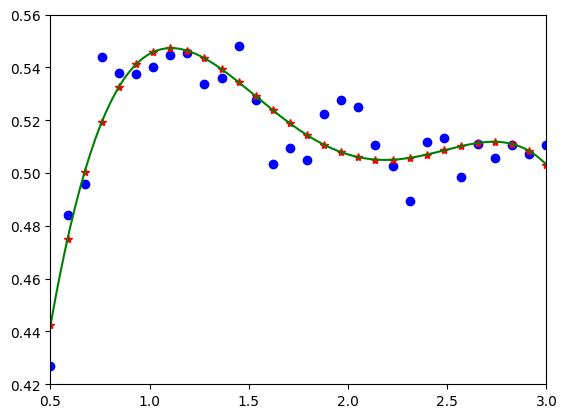

In [5]:
x = datay[:,0]
yest = datay[:,1] #  given information
ytom = datay[:,2]  # tomorrow values

(nx,) =x.shape
xmin = min(x) 
xmax = max(x)
xx = np.linspace(xmin,xmax,200) # points used for evaluation
mp=5
import scipy.linalg as las
A=np.vander(x,mp)
print(A.shape)
#A=np.zeros([nx,mp])
# Vandermonde matrix,  we look for a polynomial of degree mp-1 that better approximate the data
#A[:,0] = 1
#for j in range(1,mp):
#    A[:,j]=A[:,j-1]*x
#A1=A[:,::-1])
# we solve the least-squares problem by first computing the QR factorization, the economic mode compute only the first mp column of Q
(Q,R)=las.qr(A,mode='economic')
# after we solve the two linear systems 
p=las.solve(R, np.dot(np.transpose(Q),yest))
# A x = Q R x = b
# Q^T Q R x = Q^T b 
# R x = Q^T b 
# we evaluate the polynomial in x and xx
yr=np.polyval(p,x)
yc=np.polyval(p,xx)

# we plot the results
plt.plot(x,yest,'bo', x,yr,'r*',xx,yc,'g-')
plt.axis([xmin,xmax,0.42,0.56])
plt.show()

In [3]:
# add one row in the data and use a previously computed  QR factorization
BT = np.copy(A[0:6,:])
yest_t = np.copy(yest[0:6])
(Qb,Rb)=las.qr(BT,mode='economic')

print('shape of the matrices','R =', Rb.shape,'BT=',BT.shape,'A=',A.shape)

Qyest = np.dot(np.transpose(Qb),yest[0:6])
pb=las.solve(Rb, Qyest)
print('Solution of the problem with all data', p)
print('Solution of the problem', pb)

shape of the matrices R = (5, 5) BT= (6, 5) A= (30, 5)
Solution of the problem with all data [-0.04674372  0.37572645 -1.06865916  1.2389301   0.04592347]
Solution of the problem [ -8.58024134  24.32706842 -26.29007546  13.09187662  -2.04979986]


In [ ]:
# Givens rotation to modify the QR factorization  WE ADD A NEW ROW and we update the  result instead of computing again the QR factorization 
at = np.copy(A[6,:])
bt = np.copy(yest[6])
Rbt = np.copy(Rb)
for j in range(mp):
    tv = np.copy(Rbt[j,:])
    den = np.sqrt(tv[j]**2.+at[j]**2.) # Givens rotation sqrt(x^2+y^2)
    cc = tv[j]/den # c element of the Givens matrix
    ss = at[j]/den # s element of the Givens matrix
    Rbt[j,:]=cc*tv+ss*at
    at = -ss*tv+cc*at
    print('j',j,'at', at)
    btv = np.copy(Qyest[j])
    Qyest[j]= cc*btv+ss*bt
    bt  = -ss*btv+cc*bt
    
#full factorization with qr_insert  
af = np.copy(A[6,:])
print(af.shape)
print(Rb.shape)
(Qf6,Rf6) = las.qr_insert(Qb, Rb, af, 5)    #anzichè fare il loop a mano sta la funzione   -> USARE QUESTA NEL CASO
# Exercise, try to update the right hand side without multiply  the original one by the  traspose of Qf6

# full factorization with the last row added
B = np.copy(A[0:7,:])
yest_t = np.copy(yest[0:7])
(Qbt_6,Rbt_6)=las.qr(B,mode='economic')   
Qyest_6 = np.dot(np.transpose(Qbt_6),yest_t)
pbt=las.solve(Rbt_6, Qyest_6)

#scaling the matrices for comparison
D6 = np.sign(diag(Rbt_6));
D = np.sign(diag(Rbt));
Df6 = np.sign(diag(Rf6));
Rft_6 = np.dot(np.diag( Df6), Rf6)
Rbt_6 = np.dot(np.diag( D6), Rbt_6)
Rbt = np.dot( np.diag( D) , Rbt)
Qyest_6 = np.dot(np.diag(D6), Qyest_6)
Qyest = np.dot( np.diag( D) , Qyest)

print('Comparison of the two factorization = ')
print(np.linalg.norm(Rbt_6-Rbt,np.Inf ))

print('Comparison of the two factorization = ')
print(np.linalg.norm(Rbt_6-Rft_6,np.Inf ))

print('Comparison of the known term   = ')
print(np.linalg.norm(Qyest_6-Qyest))


#Se non cambiamo i segni per la comparazione allora possiamo usare l angolo tra i vettori


j 0 at [0.         0.12876434 0.28943505 0.49597953 0.77056032]
j 1 at [-0.00000000e+00 -1.38777878e-17  3.78293368e-02  1.44518478e-01
  3.76206244e-01]
j 2 at [-0.00000000e+00 -9.72049978e-18  3.46944695e-18 -1.22959379e-02
 -6.66268310e-02]
j 3 at [ 0.00000000e+00  6.07167006e-18 -2.16710433e-18  8.67361738e-19
 -3.38315950e-03]
j 4 at [ 0.00000000e+00  3.19867191e-18 -1.14167201e-18  4.56942753e-19
  0.00000000e+00]
(5,)
(5, 5)
Comparison of the two factorization = 
4.228752284259758e-15
Comparison of the two factorization = 
3.941291737419306e-15
Comparison of the known term   = 
1.6736692647037573e-15


In [5]:
# least square solution scipy
# lapack_driver = 'gelsd', 'gelsy', 'gelss'
# https://www.netlib.org/lapack/explore-html/d7/d3b/group__double_g_esolve_ga385713b8bcdf85663ff9a45926fac423.html
# https://www.netlib.org/lapack/explore-html/d7/d3b/group__double_g_esolve_ga385713b8bcdf85663ff9a45926fac423.html
# http://www.netlib.org/lapack/explore-html/d7/d3b/group__double_g_esolve_gaa6ed601d0622edcecb90de08d7a218ec.html
import scipy as sp
import scipy.linalg as spla
betaS, residualsS, rankS, svS = spla.lstsq(A, yest)#lapack_driver='gelsy')
print ( 'beta:')
print(betaS)
print ('residuals:', residualsS)
print ('rank:', rankS)
print ('singular values:', svS)

beta:
[-0.04674372  0.37572645 -1.06865916  1.2389301   0.04592347]
residuals: 0.00337956804325658
rank: 5
singular values: [1.82696080e+02 1.15074310e+01 2.73842395e+00 4.90013740e-01
 4.40419697e-02]


In [ ]:
#Least square solition with pytorch
import torch

# An open source machine learning framework that accelerates the path from research prototyping to production deployment.
AT = torch.tensor(A,dtype=torch.float64)
bT = torch.tensor(yest,dtype=torch.float64)
# driver chooses the LAPACK/MAGMA function that will be used. For CPU inputs the valid values are ‘gels’, ‘gelsy’, ‘gelsd', ‘gelss’.
# For CUDA input, the only valid driver is ‘gels’, which assumes that A is full-rank. 
# https://pytorch.org/docs/stable/generated/torch.linalg.lstsq.html#torch.linalg.lstsq
X = torch.linalg.lstsq(AT, bT)
print(X.solution)
print(torch.tensor(p)-X.solution)
print(X.rank)
print(X.residuals)
print(X.singular_values)

In [1]:
#Least square solition with tensorflow
#https://www.tensorflow.org/api_docs/python/tf/linalg/lstsq
import tensorflow as tf
yest=yest.reshape(30,1)
ATF = tf.constant(A,dtype=tf.float64)
bTF = tf.constant(yest,dtype=tf.float64)
XTF = tf.linalg.lstsq(ATF, bTF)
print(XTF)
print(tf.linalg.adjoint(XTF)-tf.constant(p))

2023-11-24 10:20:52.085326: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


NameError: name 'yest' is not defined

## Conditioning of least squares problems

In [2]:
import numpy as np
A = np.array([(1, 1000), (0.00099, 1)])
A

array([[1.0e+00, 1.0e+03],
       [9.9e-04, 1.0e+00]])

In [3]:
# condition number of  A and  A'A

print ('condition number of  A:', np.linalg.cond(A))
ATA = A.T.dot(A)
print ('condition number of  A\'A:', np.linalg.cond(ATA))


condition number of  A: 100000200.00009874
condition number of  A'A: 1.0010673925908428e+16


In [ ]:
# two collinear predictors #dati quasi linearmente dipendenti
tmp = np.arange(100)
A = np.zeros((100, 2))
A[:, 0] = tmp + np.random.rand(100) * 0.00000001  #se aumento l errore le colonne diventano quasi linearmente dipendenti -> per gli errori di arrotondamento la matrice è praticamente singolare
A[:, 1] = tmp + np.random.rand(100) * 0.00000001
ATA = A.T.dot(A)
print ('condition number of   A\'A  for the simulating data :', np.linalg.cond(ATA))

print ('condition number of   A for the simulating data :',np.linalg.cond(A) )


condition number of   A'A  for the simulating data : 7234035490776059.0
condition number of   A for the simulating data : 25382986479.445164


In [14]:
A=np.array([[1, 0],
[1, 1],
[1, 1]])
# we construct a matrix B with  one column almost linear combination of the column of A
B=np.zeros((3,3))
B[:,0:2]=A
B[:,2:3]= np.dot(A, np.array([[1],[0.5]]))+1e-7*np.random.randn(3,1)
print('B = ')
print(B)

B = 
[[1.         0.         1.00000009]
 [1.         1.         1.50000007]
 [1.         1.         1.50000004]]


In [32]:
import scipy as sp
# we introduce a random error  and we compute b as B times a vector of all 1 + an error
xt = np.array([[1],[1],[1]])
b=np.dot(B,xt)+1e-6*np.random.randn(3,1)
# the matrix is non singular so we can solve the system 

x = sp.linalg.solve(B, b)
print('solution of the square linear system')
print(x)

solution of the square linear system
[[-139.40991788]
 [ -69.20494619]
 [ 141.40990481]]


In [17]:
resn = np.linalg.norm(B.dot(x)-b,2)/np.linalg.norm(b,2) 
print('residual',resn)

residual 2.999296469266048e-16


In [19]:
condB= np.linalg.cond(B) 
print ('condition number of   B  :',condB )


condition number of   B  : 34435244.85586463


In [20]:
# the error is bounded by
print(' the error is bounded by', condB*resn/np.linalg.norm(b))

 the error is bounded by 9.293709017281172e-10


In [21]:
# least square solution scipy
# lapack_driver = 'gelsd', 'gelsy', 'gelss'
# https://www.netlib.org/lapack/explore-html/d7/d3b/group__double_g_esolve_ga385713b8bcdf85663ff9a45926fac423.html
# https://www.netlib.org/lapack/explore-html/d7/d3b/group__double_g_esolve_ga385713b8bcdf85663ff9a45926fac423.html
# http://www.netlib.org/lapack/explore-html/d7/d3b/group__double_g_esolve_gaa6ed601d0622edcecb90de08d7a218ec.html
import scipy as sp
import scipy.linalg as spla
betaS, residualsS, rankS, svS = spla.lstsq(B, b,lapack_driver='gelsd')
print ( 'beta:')
print(betaS)
print ('residuals:', residualsS)
print ('rank:', rankS)
print ('singular values:', svS)

beta:
[[ 3.42409125]
 [ 2.21204436]
 [-1.42409029]]
residuals: []
rank: 3
singular values: [3.17054305e+00 6.69071613e-01 9.20726152e-08]


In [22]:
BT = torch.tensor(B,dtype=torch.float64)
bT = torch.tensor(b,dtype=torch.float64)
print(BT.shape)
Xb = torch.linalg.lstsq(BT, bT,driver='gelsd')
print(Xb.solution)
print(Xb.rank)
print(Xb.residuals)
print(Xb.singular_values)

torch.Size([3, 3])
tensor([[ 3.4241],
        [ 2.2120],
        [-1.4241]], dtype=torch.float64)
tensor(3)
tensor([], dtype=torch.float64)
tensor([3.1705e+00, 6.6907e-01, 9.2073e-08], dtype=torch.float64)


In [23]:
#  we have a very small singular value, compute  an approximate solution  using only the first two  singular value
# the numerical rank could be considered as two
U, s, V = np.linalg.svd(B, full_matrices=False)
xT = np.dot(V[0:2,:].T,(np.dot( b.T, U[:,0:2])/s[0:2]).T)
print(xT)

[[0.77777845]
 [0.88888802]
 [1.22222246]]


In [24]:
# the residual is small,has the same order of the error in the data, the data have a better meaning
#
resn = np.linalg.norm(B.dot(xT)-b,2)/np.linalg.norm(b,2) 
print(resn)

6.846055769513024e-08


## Principal Component Regression

The minimal norm solution of $\| Ax -b \|$ is given byb

$$
\sum_{i=1}^r \frac{𝑢^𝑇_𝑖 𝑏}{ \sigma_𝑖}𝑣_𝑖
$$
If the smallest singular values are very small, that is the numerical rank is not the same as the theoretical one, we look for the solution in a subspace of dimension $k$. If we use as basis for this subspace the first $k$ vector of $v_i$ the solution is 

$$
\sum_{i=1}^k \frac{𝑢^𝑇_𝑖 𝑏}{ \sigma_𝑖}𝑣_𝑖
$$

It is useful to find the minimal value of $k$ that make the residual reduction sufficiently small. This algorithm is called  Principal Component Regression

We show an example taken form the book of Larns Elden "Matrix Methods in Data Mining and Pattern Recognition", SIAM, 2007.

Term-document matrices are used in information retrieval. Consider the following selection of five documents.
Key words, which we call terms, are marked in boldface.

Document 1: The <b> Google </b>  <b> matrix </b> $P$ is a model of the <b> Internet</b>.

Document 2: $P_{ij}$ is nonzero if there is a <b>link</b> from <b> Web  page</b> j to i.

Document 3: The <b>Google</b>  <b>matrix</b> is used to rank all <b> Web pages</b>.

Document 4: The <b>ranking</b> is done by solving a <b>matrix</b>  <b>eigenvalue</b> problem.

Document 5: <b>England</b> dropped out of the top 10 in the <b>FIFA</b> ranking.
    
    
Term:

1. eigenvalue 

2. England 

3. FIFA 

4. Google 

5. Internet 

6. link 

7. matrix 

8. page 

9. rank 

10. Web

In [41]:
import numpy as np
#  associated matrix

A = np.array([
[0, 0, 0, 1, 0],
[0, 0, 0, 0, 1],
[0, 0, 0, 0, 1],
[1, 0, 1, 0, 0],
[1, 0, 0, 0, 0],
[0, 1, 0, 0, 0],
[1, 0, 1, 1, 0],
[0, 1, 1, 0, 0],
[0, 0, 1, 1, 1],
[0, 1, 1, 0, 0]])


We have two query vectors:

$q_1$ “contains Google terms"

$q_2$ terms are related only to the “football document.”
    

In [42]:
# query vectors
q1 = np.array([ 
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[1],
[1],
[1]])

q2 = np.array([ 
[0],
[1],
[1],
[0],
[0],
[0],
[0],
[0],
[0],
[0]])

In [43]:
# compute the  svd saving only the necessary information
U, s, V = np.linalg.svd(A, full_matrices=False)
print('singular values = ',s)

xT = np.dot(V[0:5,:].T,(np.dot( q1.T, U[:,0:5])/s[0:5]).T)
print('solution vector = ')
print(xT)
print(V)

singular values =  [2.85464601 1.88228579 1.73205081 1.2603301  0.84827142]
solution vector = 
[[-4.44444444e-01]
 [ 2.22222222e-01]
 [ 6.66666667e-01]
 [ 4.95222792e-16]
 [ 1.11111111e-01]]
[[ 3.70237707e-01  2.91238553e-01  7.49794211e-01  4.06766946e-01
   2.24618430e-01]
 [ 1.39281795e-01 -7.02967348e-01 -1.90855565e-01  4.57341116e-01
   4.90765469e-01]
 [-6.66666667e-01  3.33333333e-01  6.31188734e-16 -1.30348088e-15
   6.66666667e-01]
 [ 4.72205185e-01 -4.36045597e-02  3.07754012e-02 -7.28100546e-01
   4.94007465e-01]
 [-4.19645613e-01 -5.54981571e-01  6.32799865e-01 -3.08624936e-01
  -1.42154828e-01]]


In [44]:
print('q1  coordinates  in terms of the first five left singular vectors of U')
print(np.dot( U[:,0:5].T ,q1))
print('q2  coordinates  in terms of the first five left singular vectors of U')
print(np.dot( U[:,0:5].T ,q2))

q1  coordinates  in terms of the first five left singular vectors of U
[[ 1.213196  ]
 [-0.54741677]
 [ 0.76980036]
 [-0.18167938]
 [ 0.39805265]]
q2  coordinates  in terms of the first five left singular vectors of U
[[ 0.15737043]
 [ 0.52145691]
 [ 0.76980036]
 [ 0.78393345]
 [-0.33516354]]


Populating the interactive namespace from numpy and matplotlib


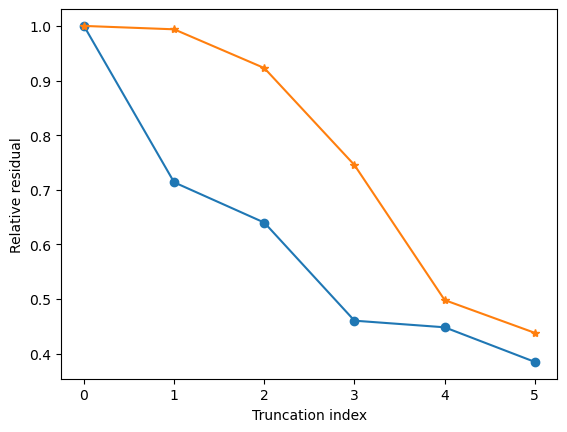

In [45]:
%pylab inline
# residual of the two vectors changing k
res1=np.zeros((6,1)) 
res2=np.zeros((6,1))
nq1 = np.linalg.norm(q1,2)
nq2 = np.linalg.norm(q2,2)
for i in range(0,6):
   # xT1 = np.dot(V[0:i,:].T, np.dot( np.diag(1/s[0:i]),np.dot( U[:,0:i].T ,q1) ))
    xT1 = np.dot(V[0:i,:].T,(np.dot( q1.T, U[:,0:i])/s[0:i]).T)
    res1[i] = np.linalg.norm( np.dot(A,xT1)-q1,2)/nq1
   # xT2 = np.dot(V[0:i,:].T, np.dot( np.diag(1/s[0:i]),np.dot( U[:,0:i].T ,q2) ))
    xT2 = np.dot(V[0:i,:].T,(np.dot( q2.T, U[:,0:i])/s[0:i]).T)
    res2[i] = np.linalg.norm( np.dot(A,xT2)-q2,2)/nq2

plot(res1,'-o')
plot(res2,'-*')
xlabel('Truncation index')
ylabel('Relative residual')
show()

If we want to reduce the relative residual to under 0.7 in this example, then
we should choose k = 2 for $q_1$ and k = 4 for $q_2$.